# KeynaSerology example 1: Loading the package dependencies and data visualisation
In this notebook we give an example of using KenyaSerology to fit transmission and observation parameters for Nairobi using PCR postive swab data and serology test samples (organised by collection date), and Google mobility data. We cover:

* Loading package dependencies
* Loading swab test, serology and death data.
* Visualising the data.


## Getting started
*KenyaSerology* is not (currently) part of the Julia package ecosystem general directory, therefore
1. Clone this project using e.g. git clone.
2. Activate the Julia REPL.
3. cd to the KenyaSerology directory
4. Open the Package manager using `]`, activate and instantiate your copy of KenyaSerology.

Then run:

    (v1.0) pkg> activate .
    (KenyaSerology) pkg> instantiate

This will install the dependencies of KenyaSerology (see Project.toml) and will install the packages in the same state that is given by the Manifest.toml file. 

After cloning this repository to your machine you will need to add the `/src` folder to your PATH to be able to import KenyaSerology.

In [7]:
using JLD2, Plots
cd(joinpath(homedir(),"GitHub/KenyaSerology/")) #Sets the working directory to the /KenyaSerology directory

## Loading and visualising the data

On this repository we give the available aggregated case, serology and death data upto 6th August, 2020 in both CSV format (for ease of inspection), and JLD2 format (for ease of use in the code). We use the `@load` macro from the JLD2 package to load the case (PCR-confirmed positive), serology and death data into main scope.

In [2]:
@load("data/case_data_by_area_21feb_to_6aug.jld2");#loads case_data
@load("data/serologydata_21feb_6aug.jld2");# loads sero_data
@load("data/death_data_by_area_21feb_to_6aug.jld2"); #loads death_data

The data structures are each `NamedTuple` types called respectively `case_data`, `sero_data`, and, `death_data`. Each data structure has an `areas` and `dates` field and a main data array. For cases and deaths the first dimension of the data array varies along dates, and the second by areas (counties). For the serology data there is a third dimension for negative samples.

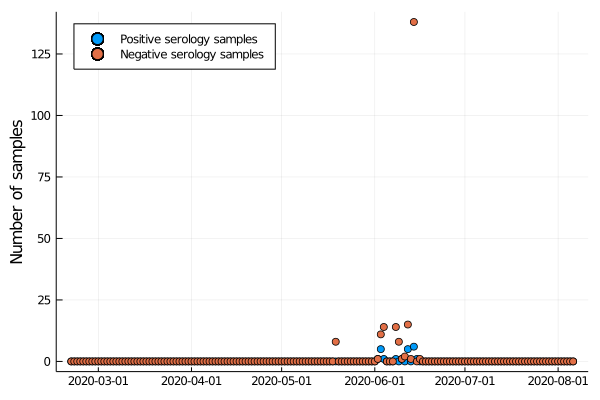

In [10]:
#Scatter plot for serology in Nairobi
gr()#Using the GR plotting backend to Plots.jl
seroareas = uppercase.(sero_data.areas) 
#The different datafiles had area names saved in either upper or lower case characters depending on
#the underlying dataset. Saving as uppercase eliminates possible confusion.

scatter(sero_data.dates,sero_data.serodata[:,seroareas.=="NAIROBI",1],
        lab = "Positive serology samples",
        legend = :topleft,
        ylabel = "Number of samples")
scatter!(sero_data.dates,sero_data.serodata[:,seroareas.=="NAIROBI",2],
        lab = "Negative serology samples")

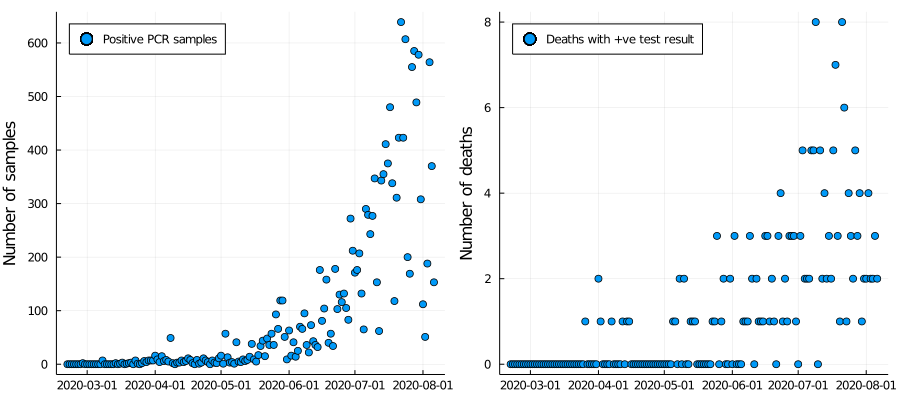

In [18]:
#Scatter plots for cases and deaths in Nairobi
caseareas = uppercase.(case_data.areas) 
deathareas = uppercase.(death_data.areas)

plt_cases = scatter(case_data.dates,case_data.cases[:,caseareas.=="NAIROBI"],
        lab = "Positive PCR samples",
        legend = :topleft,
        ylabel = "Number of samples")
plt_deaths = scatter(death_data.dates,death_data.deaths[:,deathareas.=="NAIROBI"],
        lab = "Deaths with +ve test result",
        legend = :topleft,
        ylabel = "Number of deaths")
plot(plt_cases,plt_deaths,
    size = (900,400))